In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os
import matplotlib.ticker as ticker

In [2]:
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  

In [3]:
comments_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\03_Data_Labelization\\Data", "comments_final_labels.csv") 

df_comments = pd.read_csv(comments_path)

columns_to_use = ['Tarih','Boy','Kilo','Beden' ,'Ürün Adı', 'Yorum_V1',  'final_label', 'final_skor']

df_comments = df_comments[columns_to_use].copy()

df_comments.head()

,Tarih,Boy,Kilo,Beden,Ürün Adı,Yorum_V1,final_label,final_skor
0,17 Şubat 2025,168cm,55,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"Çok güzel 1.68 ,55 kilo s beden tam oldu",olumlu,0.959417
1,14 Şubat 2025,165cm,59,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,olumlu,0.250283
2,23 Aralık 2024,168cm,60,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,olumlu,0.924882
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"çok beğendim, kumaşı farklı ve gerçekten çok şık",olumlu,0.959421
4,01 Şubat 2025,157cm,46,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,olumsuz,-0.144843


In [4]:
products_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\02_Data_Cleaning\\Data", "products_cleaned.csv") 

df_products = pd.read_csv(products_path)

df_products.head()

,Ürün Adı,Kumaş Tipi,Materyal,Kalıp,Kol Boyu,Persona,Kol Tipi,Desen,Yaka Tipi,Renk,Ürün Detayı,Cep,Koleksiyon,Astar Durumu,Boy,Siluet,Ortam,Dokuma Tipi,Baskı/Nakış Tekniği,Kemer/Kuşak Durumu,Sürdürülebilirlik Detayı,Paket İçeriği,Yaş,Sezon,Ek Özellik,Kapama Şekli,Kalınlık
0,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Örme,Polyester Karışımlı,Slim,Uzun,Cool & Comfort,Standart Kol,Düz,Kayık Yaka,Siyah,Sırt Dekolteli,Cepsiz,Ramadan,Astarsız,Maxi,Bodycone,Casual/Günlük,Gofre,Baskısız,Kemersiz,Hayır,Tekli,Tüm Yaş Grupları,Kış,NaN,NaN,NaN
1,TRENDYOLMİLLA Siyah Kısa Kol Bodycone/Vücuda Oturan Bisiklet Yaka Esnek Örme Maxi Kalem Elbise TWOSS24EL00097,Örme,NaN,Slim,Kısa,Fashion Forward,Standart Kol,Düz,Bisiklet Yaka,Siyah,NaN,NaN,Ramadan,Astarsız,Maxi,Bodycone,Casual/Günlük,Kalın Sandy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TRENDYOLMİLLA Mavi Cep Detaylı Mini Denim Gömlek Elbise TWOAW23EL00643,Denim,Denim,Slim,Uzun,Fashion Forward,Standart Kol,Düz,Gömlek Yaka,Mavi,NaN,Cepsiz,NaN,Astarsız,Kısa,Bodycone,Şık/Gece,Rigid,NaN,Kemersiz,Hayır,NaN,Tüm Yaş Grupları,Tüm Sezonlar,Ek Özellik Mevcut Değil,NaN,NaN
3,TRENDYOLMİLLA Geometrik Desenli Maxi Dokuma Püsküllü Plaj Elbisesi TBESS24EL00166,Dokuma,Dokuma,Regular,Kısa,Cool & Comfort,Standart Kol,Geometrik,Hakim Yaka,Çok Renkli,NaN,Cepsiz,NaN,Astarsız,Midi,Skater,Beachwear,Mesh,NaN,Kemersiz,Hayır,NaN,Tüm Yaş Grupları,Yaz,NaN,NaN,NaN
4,TRENDYOLMİLLA Siyah Fitted/Vücuda Oturan Askılı Maxi Esnek Örme Kalem Elbise TWOSS23EL02435,Örme,Elastan,Slim,Askılı,Fashion Forward,Standart Kol,Düz,Kare Yaka,Siyah,NaN,Cepsiz,Ramadan,Astarsız,Maxi,Bodycone,Casual/Günlük,Kalın Sandy,Baskısız,Kemersiz,Hayır,Tekli,Tüm Yaş Grupları,NaN,NaN,NaN,NaN


In [5]:
df_merged = df_comments.merge(df_products, on='Ürün Adı', how='left', indicator=True)

df_merged['Kontrol_Eslesme'] = df_merged['_merge'] == 'both'

df_merged.head()

,Tarih,Boy_x,Kilo,Beden,Ürün Adı,Yorum_V1,final_label,final_skor,Kumaş Tipi,Materyal,Kalıp,Kol Boyu,Persona,Kol Tipi,Desen,Yaka Tipi,Renk,Ürün Detayı,Cep,Koleksiyon,Astar Durumu,Boy_y,Siluet,Ortam,Dokuma Tipi,Baskı/Nakış Tekniği,Kemer/Kuşak Durumu,Sürdürülebilirlik Detayı,Paket İçeriği,Yaş,Sezon,Ek Özellik,Kapama Şekli,Kalınlık,_merge,Kontrol_Eslesme
0,17 Şubat 2025,168cm,55,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"Çok güzel 1.68 ,55 kilo s beden tam oldu",olumlu,0.959417,Örme,Polyester Karışımlı,Slim,Uzun,Cool & Comfort,Standart Kol,Düz,Kayık Yaka,Siyah,Sırt Dekolteli,Cepsiz,Ramadan,Astarsız,Maxi,Bodycone,Casual/Günlük,Gofre,Baskısız,Kemersiz,Hayır,Tekli,Tüm Yaş Grupları,Kış,NaN,NaN,NaN,both,True
1,14 Şubat 2025,165cm,59,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,olumlu,0.250283,Örme,Polyester Karışımlı,Slim,Uzun,Cool & Comfort,Standart Kol,Düz,Kayık Yaka,Siyah,Sırt Dekolteli,Cepsiz,Ramadan,Astarsız,Maxi,Bodycone,Casual/Günlük,Gofre,Baskısız,Kemersiz,Hayır,Tekli,Tüm Yaş Grupları,Kış,NaN,NaN,NaN,both,True
2,23 Aralık 2024,168cm,60,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,olumlu,0.924882,Örme,Polyester Karışımlı,Slim,Uzun,Cool & Comfort,Standart Kol,Düz,Kayık Yaka,Siyah,Sırt Dekolteli,Cepsiz,Ramadan,Astarsız,Maxi,Bodycone,Casual/Günlük,Gofre,Baskısız,Kemersiz,Hayır,Tekli,Tüm Yaş Grupları,Kış,NaN,NaN,NaN,both,True
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"çok beğendim, kumaşı farklı ve gerçekten çok şık",olumlu,0.959421,Örme,Polyester Karışımlı,Slim,Uzun,Cool & Comfort,Standart Kol,Düz,Kayık Yaka,Siyah,Sırt Dekolteli,Cepsiz,Ramadan,Astarsız,Maxi,Bodycone,Casual/Günlük,Gofre,Baskısız,Kemersiz,Hayır,Tekli,Tüm Yaş Grupları,Kış,NaN,NaN,NaN,both,True
4,01 Şubat 2025,157cm,46,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,olumsuz,-0.144843,Örme,Polyester Karışımlı,Slim,Uzun,Cool & Comfort,Standart Kol,Düz,Kayık Yaka,Siyah,Sırt Dekolteli,Cepsiz,Ramadan,Astarsız,Maxi,Bodycone,Casual/Günlük,Gofre,Baskısız,Kemersiz,Hayır,Tekli,Tüm Yaş Grupları,Kış,NaN,NaN,NaN,both,True


In [6]:
df_merged["Kontrol_Eslesme"].unique()

array([ True])

In [7]:
df_merged.drop(columns=['_merge'], inplace=True)

Ürün Özelliklerinin Label Dağılımı

Boş (NaN) Kalınlık değeri sayısı: 100403

Boş değerlerin final_label dağılımı:
final_label
olumlu     85900
olumsuz    14503
Name: count, dtype: int64


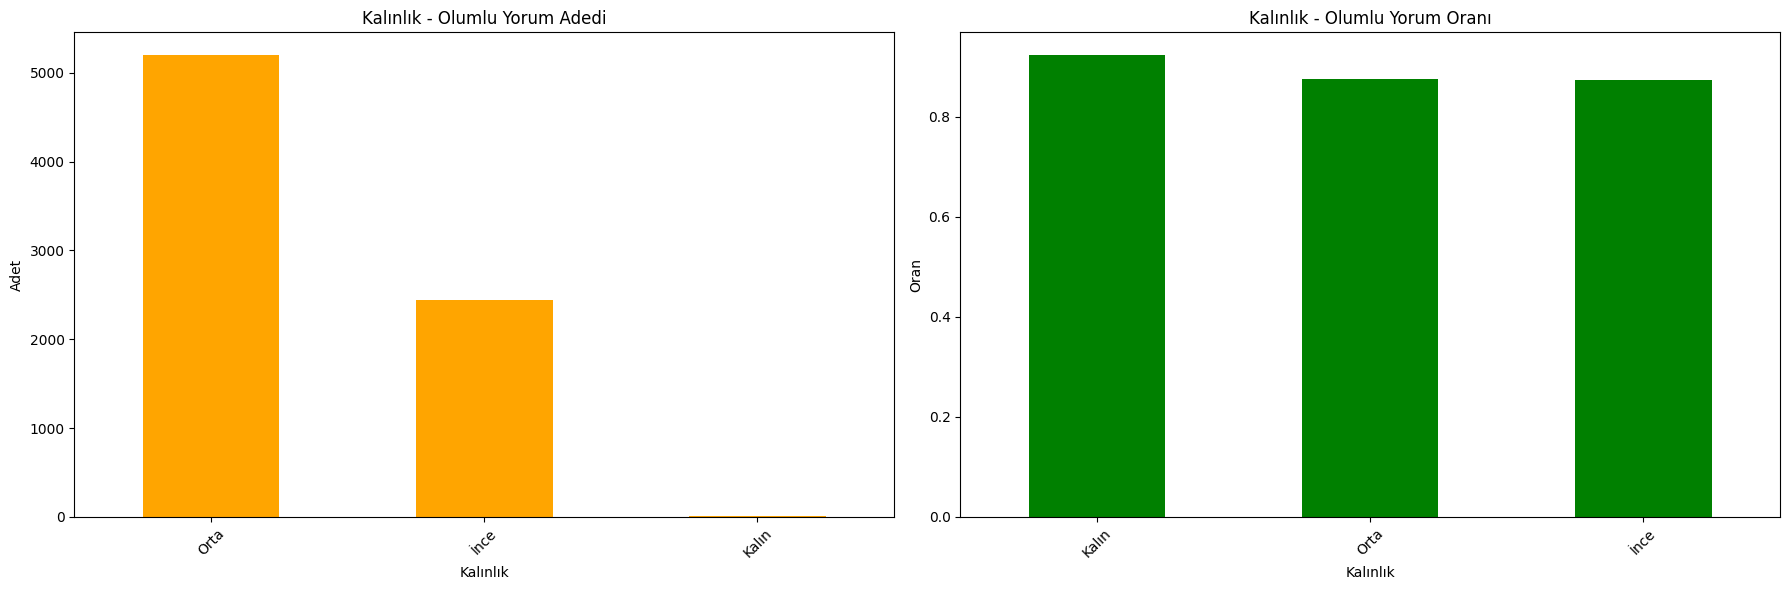

In [8]:
bos_adet = df_merged['Kalınlık'].isna().sum()
print("Boş (NaN) Kalınlık değeri sayısı:", bos_adet)

boslar = df_merged[df_merged['Kalınlık'].isna()]

bos_label_sayim = boslar['final_label'].value_counts()
print("\nBoş değerlerin final_label dağılımı:")
print(bos_label_sayim)

dolu = df_merged[df_merged['Kalınlık'].notna()]

olumlu_dolu = dolu[dolu['final_label'] == 'olumlu']
toplam_dolu = dolu.groupby('Kalınlık').size()
olumlu_sayim = olumlu_dolu['Kalınlık'].value_counts()

oran = (olumlu_sayim / toplam_dolu).fillna(0)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

olumlu_sayim.sort_values(ascending=False).plot(kind='bar', ax=axes[0], color='orange')
axes[0].set_title("Kalınlık - Olumlu Yorum Adedi")
axes[0].set_xlabel("Kalınlık")
axes[0].set_ylabel("Adet")
axes[0].tick_params(axis='x', rotation=45)

oran.sort_values(ascending=False).plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title("Kalınlık - Olumlu Yorum Oranı")
axes[1].set_xlabel("Kalınlık")
axes[1].set_ylabel("Oran")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [9]:
df_merged.columns

Index(['Tarih', 'Boy_x', 'Kilo', 'Beden', 'Ürün Adı', 'Yorum_V1',
       'final_label', 'final_skor', 'Kumaş Tipi', 'Materyal', 'Kalıp',
       'Kol Boyu', 'Persona', 'Kol Tipi', 'Desen', 'Yaka Tipi', 'Renk',
       'Ürün Detayı', 'Cep', 'Koleksiyon', 'Astar Durumu', 'Boy_y', 'Siluet',
       'Ortam', 'Dokuma Tipi', 'Baskı/Nakış Tekniği', 'Kemer/Kuşak Durumu',
       'Sürdürülebilirlik Detayı', 'Paket İçeriği', 'Yaş', 'Sezon',
       'Ek Özellik', 'Kapama Şekli', 'Kalınlık', 'Kontrol_Eslesme'],
      dtype='object')

In [10]:
def grafik_olumlu_analiz(df, kolon_listesi):
    for kolon in kolon_listesi:
        print(f"\n--- {kolon.upper()} ---")

        bos_adet = df[kolon].isna().sum()
        print(f"Boş (NaN) {kolon} değeri sayısı:", bos_adet)

        boslar = df[df[kolon].isna()]
        bos_label_sayim = boslar['final_label'].value_counts()
        print("\nBoş değerlerin final_label dağılımı:")
        print(bos_label_sayim)

        dolu = df[df[kolon].notna()]
        olumlu_dolu = dolu[dolu['final_label'] == 'olumlu']
        toplam_dolu = dolu.groupby(kolon).size()
        olumlu_sayim = olumlu_dolu[kolon].value_counts()
        oran = (olumlu_sayim / toplam_dolu).fillna(0)

        fig, axes = plt.subplots(1, 2, figsize=(18, 6))
        fig.suptitle(f"{kolon} - Olumlu Yorum Analizi", fontsize=16, fontweight='bold')

        # Sol grafik: Olumlu Adet
        olumlu_sayim_sorted = olumlu_sayim.sort_values(ascending=False)
        olumlu_sayim_sorted.plot(kind='bar', ax=axes[0], color='orange')
        axes[0].set_title("Olumlu Yorum Adedi")
        axes[0].set_xlabel(kolon)
        axes[0].set_ylabel("Adet")
        axes[0].tick_params(axis='x', rotation=45)
        for i, v in enumerate(olumlu_sayim_sorted.values):
            axes[0].text(i, v + 0.5, str(int(v)), ha='center', va='bottom', fontsize=9)

        # Sağ grafik: Oran
        oran_sorted = oran.sort_values(ascending=False)
        oran_sorted.plot(kind='bar', ax=axes[1], color='green')
        axes[1].set_title("Olumlu Yorum Oranı")
        axes[1].set_xlabel(kolon)
        axes[1].set_ylabel("Oran")
        axes[1].tick_params(axis='x', rotation=45)
        for i, v in enumerate(oran_sorted.values):
            axes[1].text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=9)

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()



--- KUMAŞ TIPI ---
Boş (NaN) Kumaş Tipi değeri sayısı: 0

Boş değerlerin final_label dağılımı:
Series([], Name: count, dtype: int64)


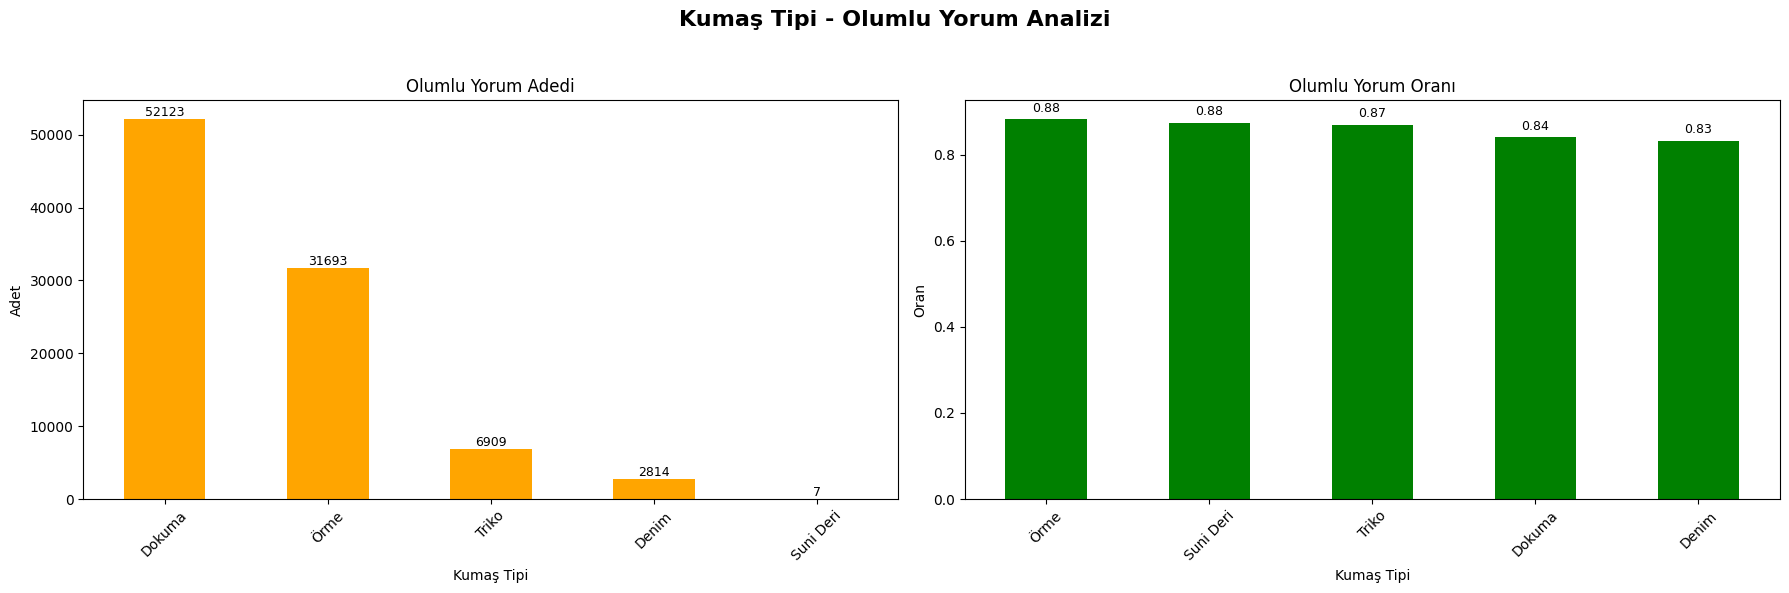


--- MATERYAL ---
Boş (NaN) Materyal değeri sayısı: 13596

Boş değerlerin final_label dağılımı:
final_label
olumlu     11646
olumsuz     1950
Name: count, dtype: int64


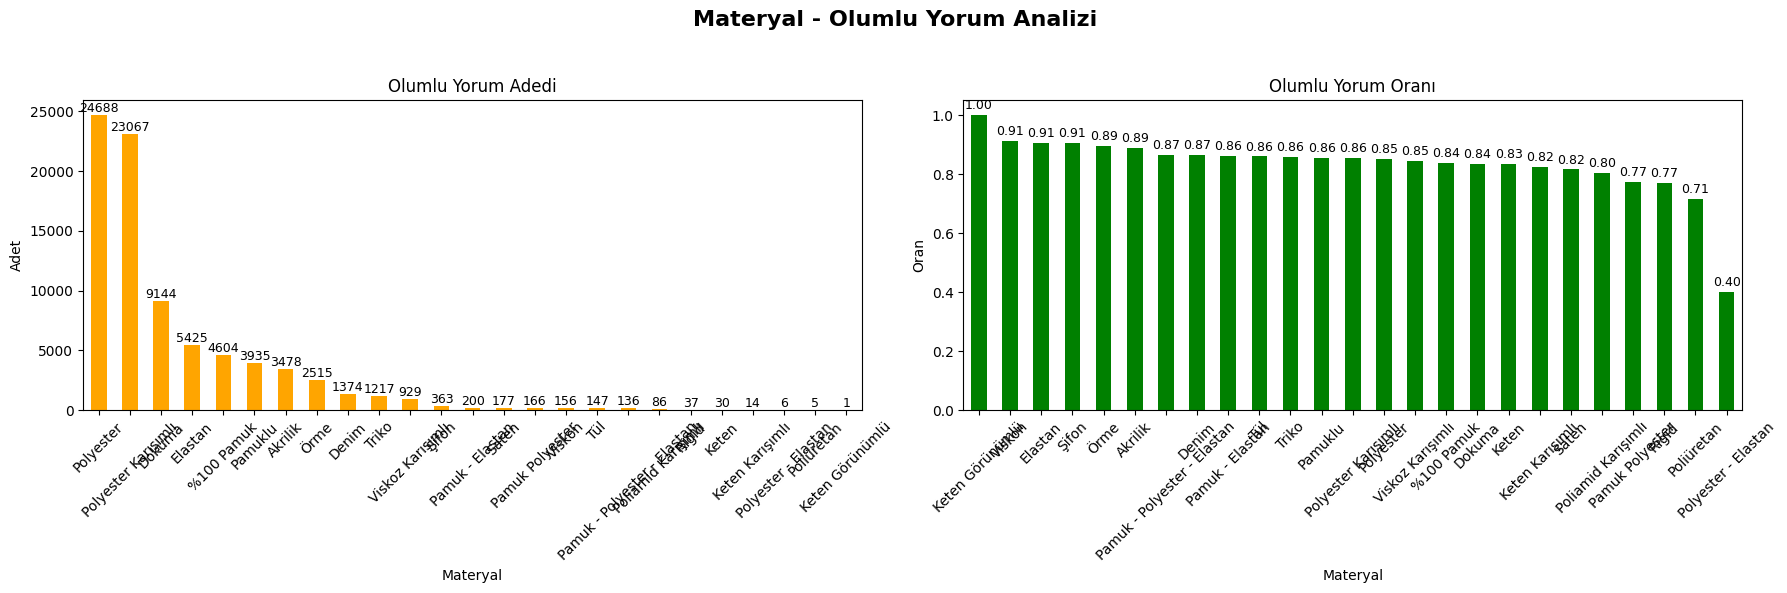


--- KALIP ---
Boş (NaN) Kalıp değeri sayısı: 0

Boş değerlerin final_label dağılımı:
Series([], Name: count, dtype: int64)


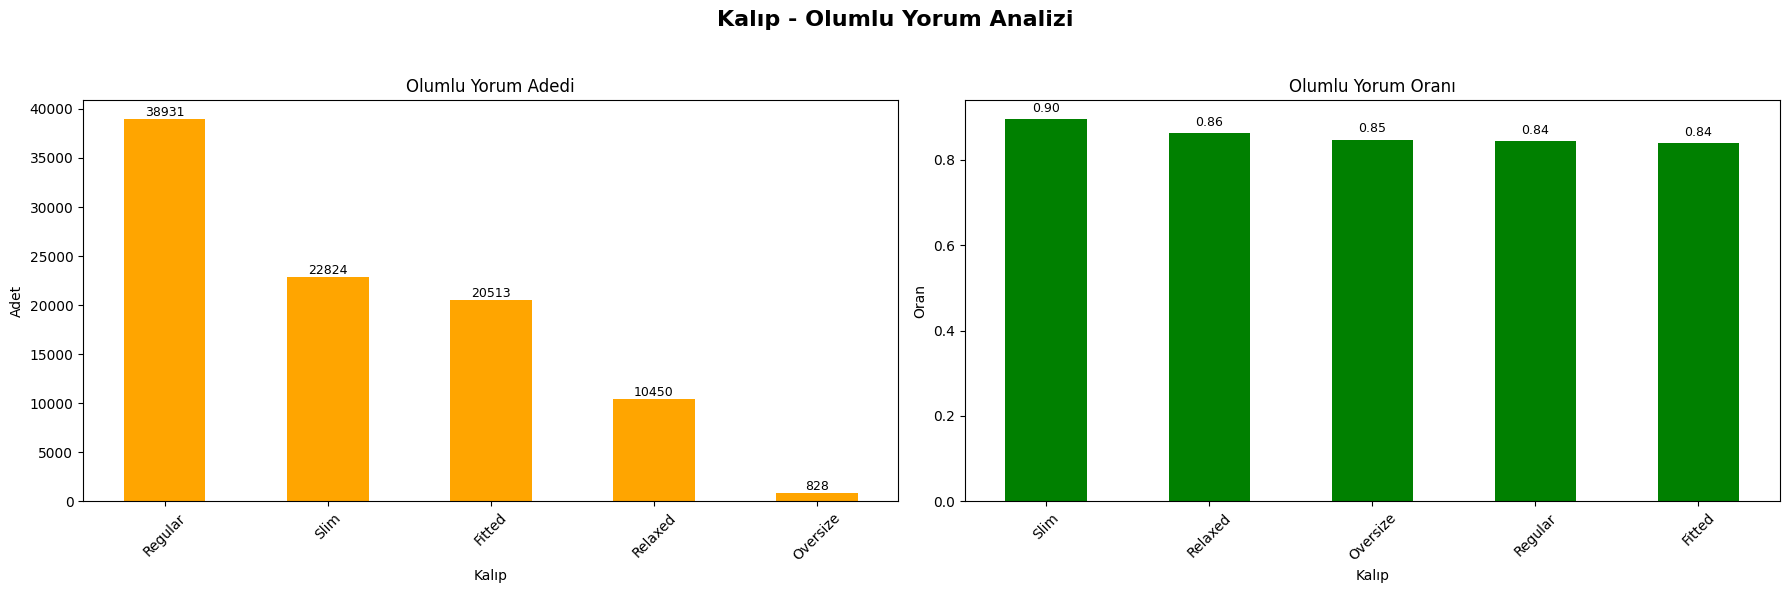


--- KOL BOYU ---
Boş (NaN) Kol Boyu değeri sayısı: 0

Boş değerlerin final_label dağılımı:
Series([], Name: count, dtype: int64)


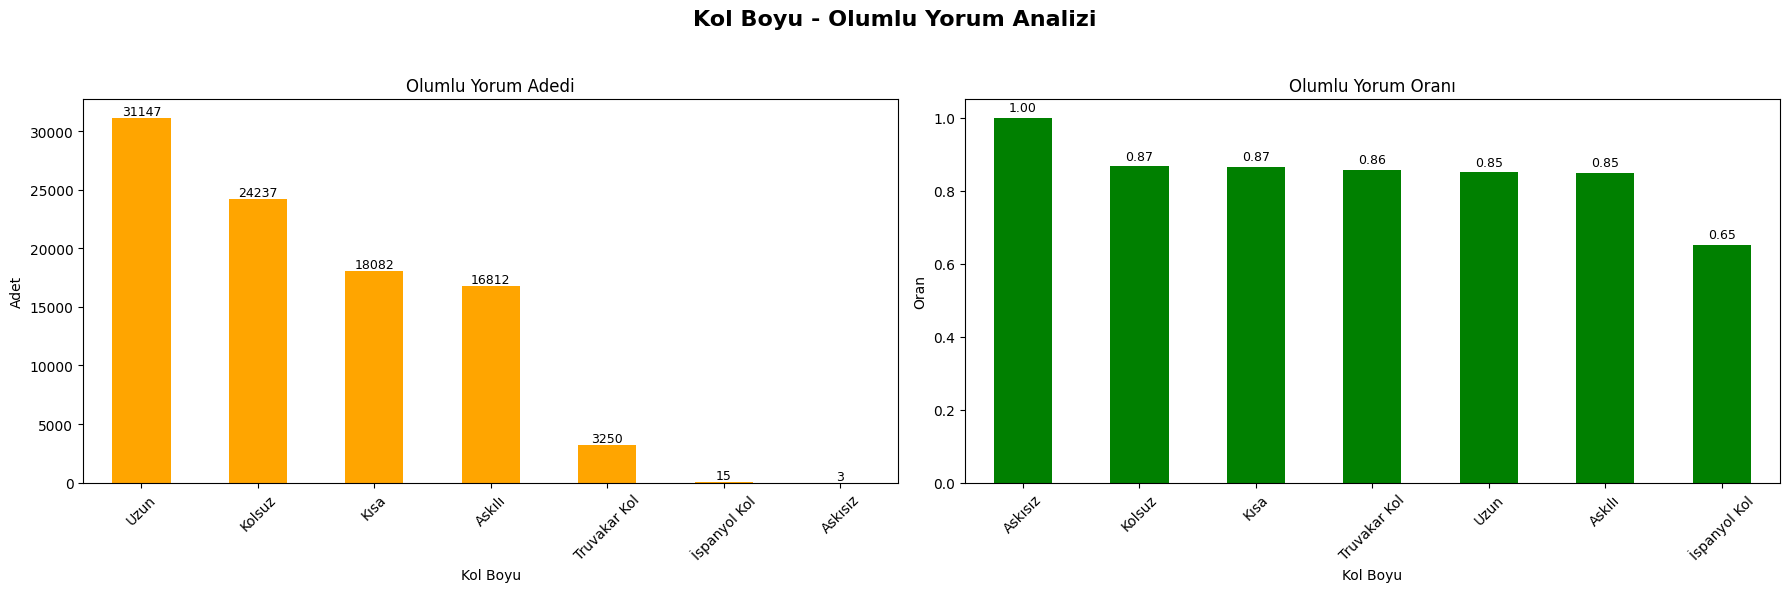


--- PERSONA ---
Boş (NaN) Persona değeri sayısı: 0

Boş değerlerin final_label dağılımı:
Series([], Name: count, dtype: int64)


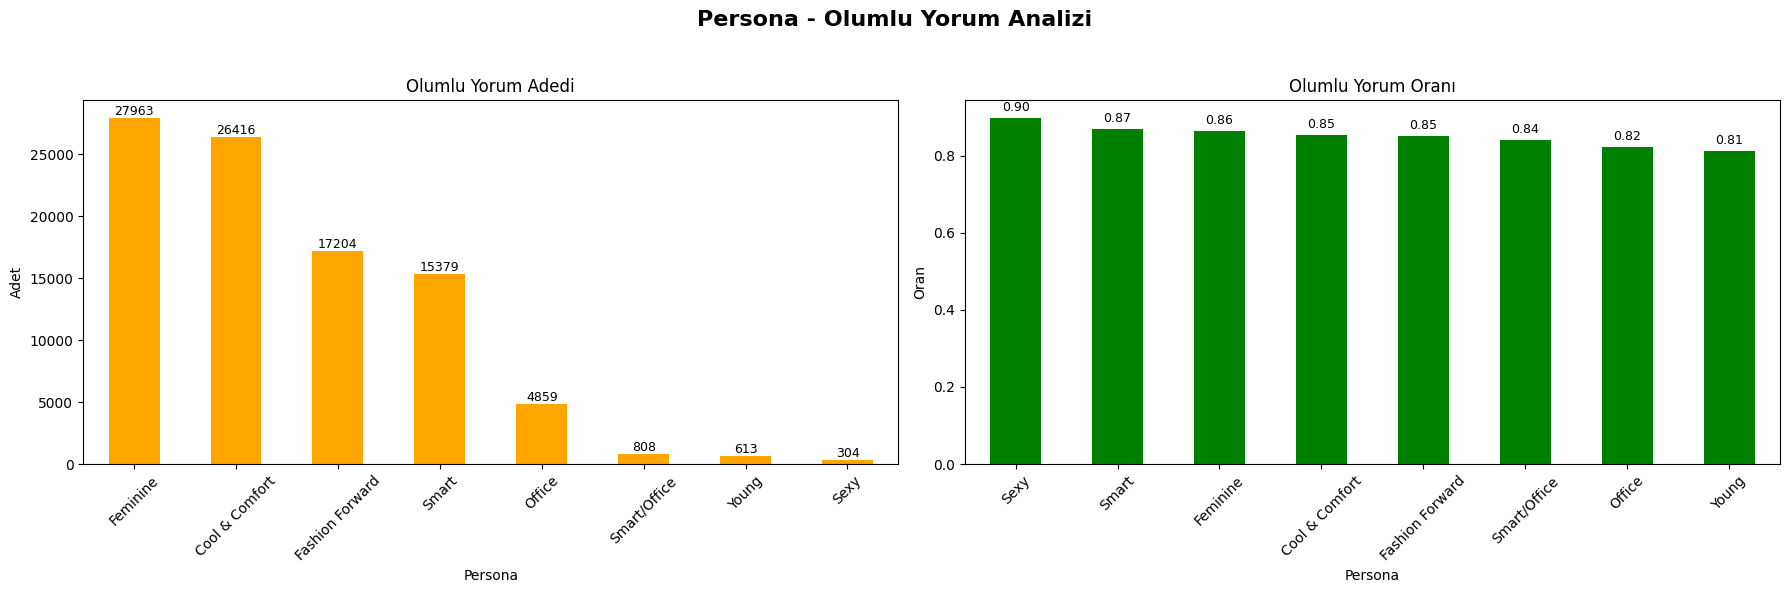


--- KOL TIPI ---
Boş (NaN) Kol Tipi değeri sayısı: 0

Boş değerlerin final_label dağılımı:
Series([], Name: count, dtype: int64)


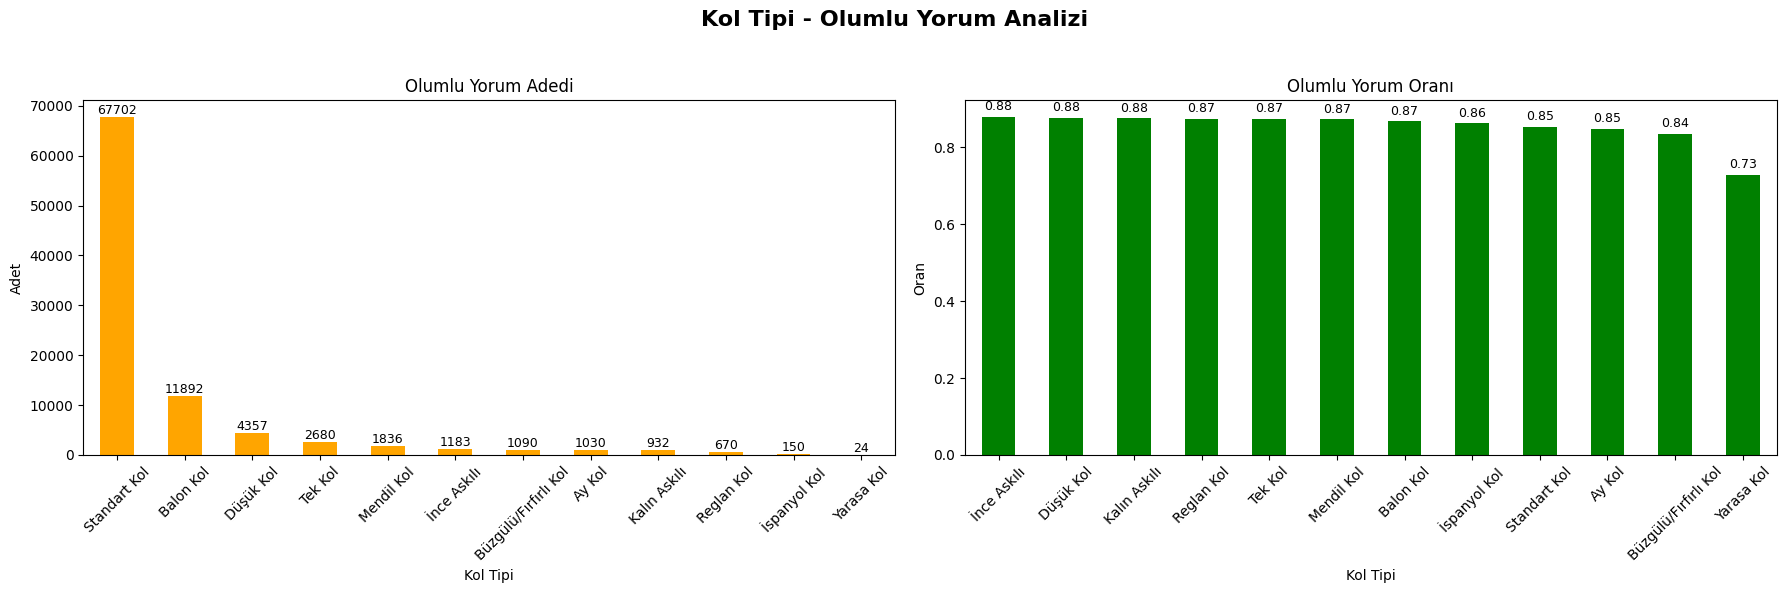


--- DESEN ---
Boş (NaN) Desen değeri sayısı: 0

Boş değerlerin final_label dağılımı:
Series([], Name: count, dtype: int64)


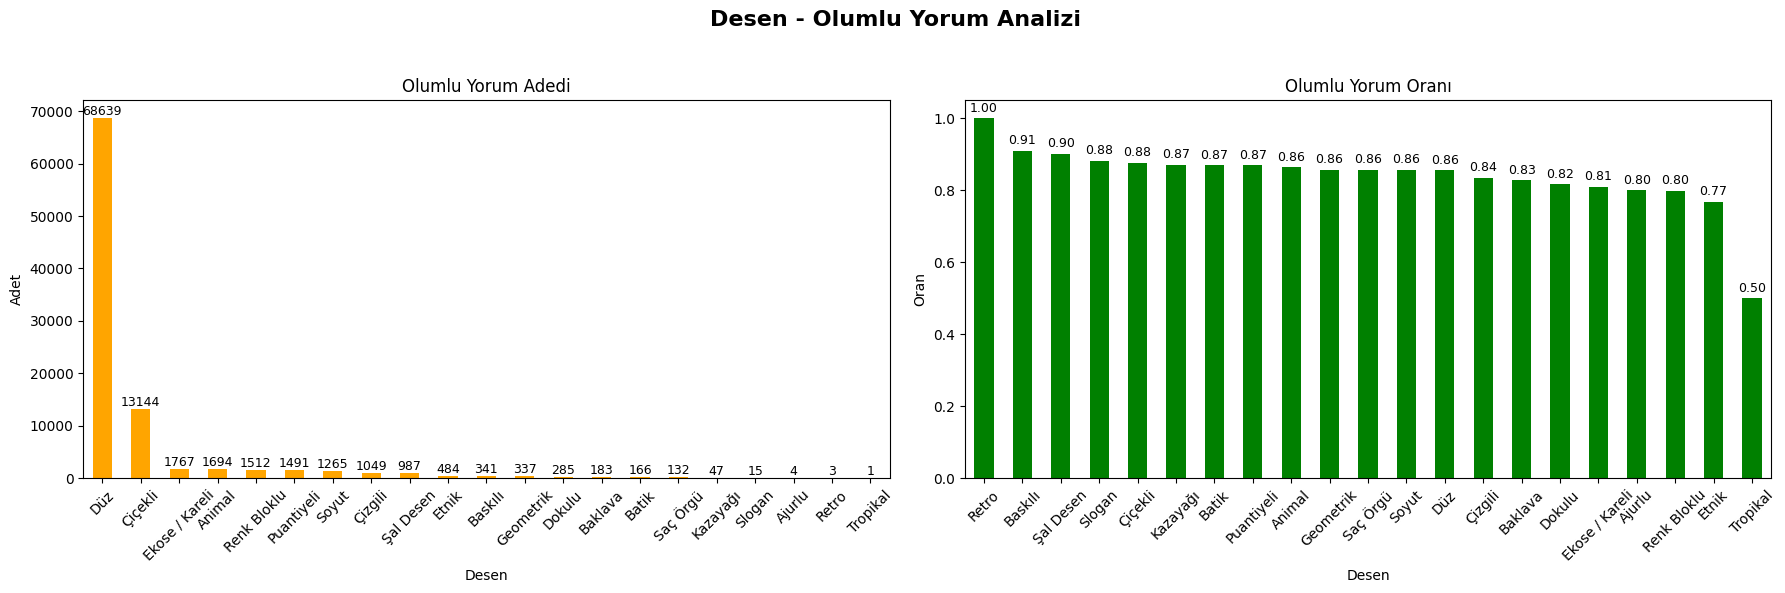


--- YAKA TIPI ---
Boş (NaN) Yaka Tipi değeri sayısı: 0

Boş değerlerin final_label dağılımı:
Series([], Name: count, dtype: int64)


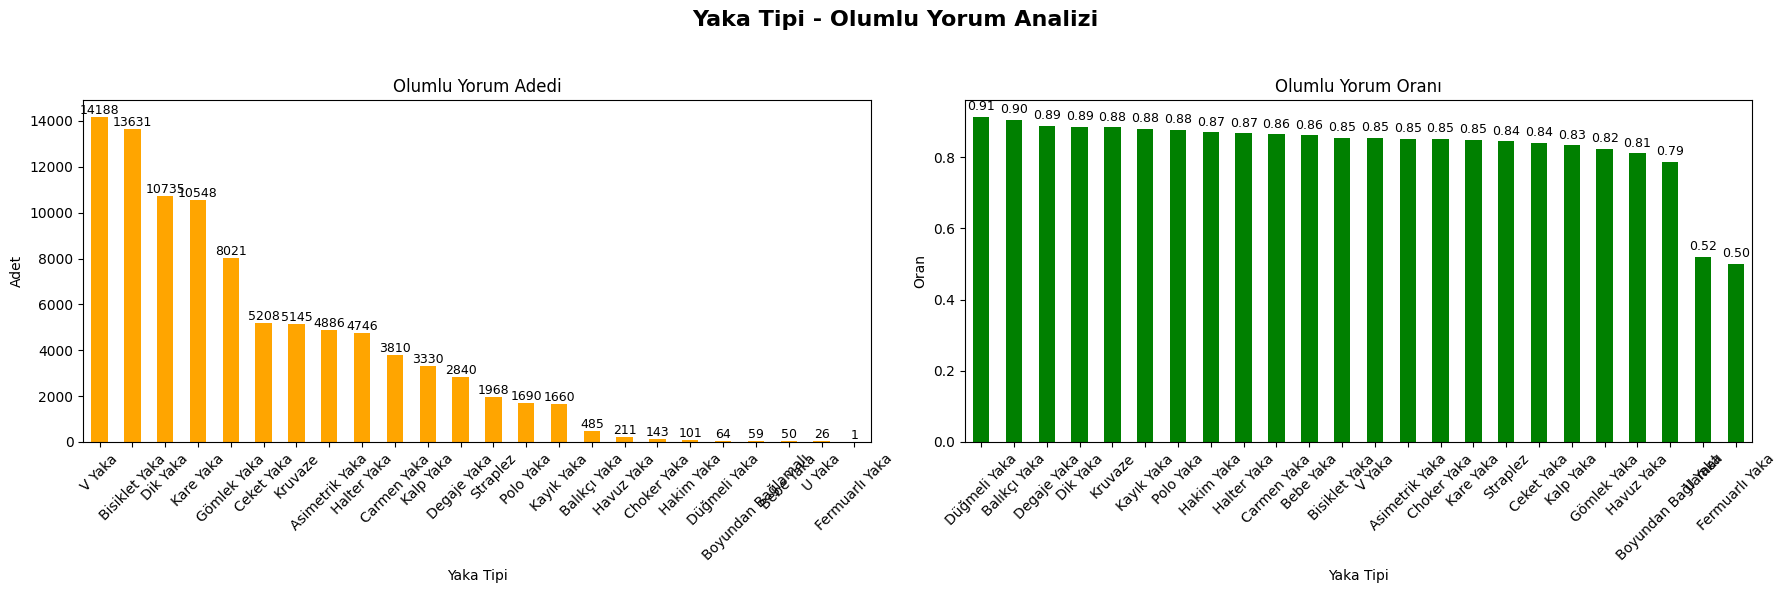


--- RENK ---
Boş (NaN) Renk değeri sayısı: 0

Boş değerlerin final_label dağılımı:
Series([], Name: count, dtype: int64)


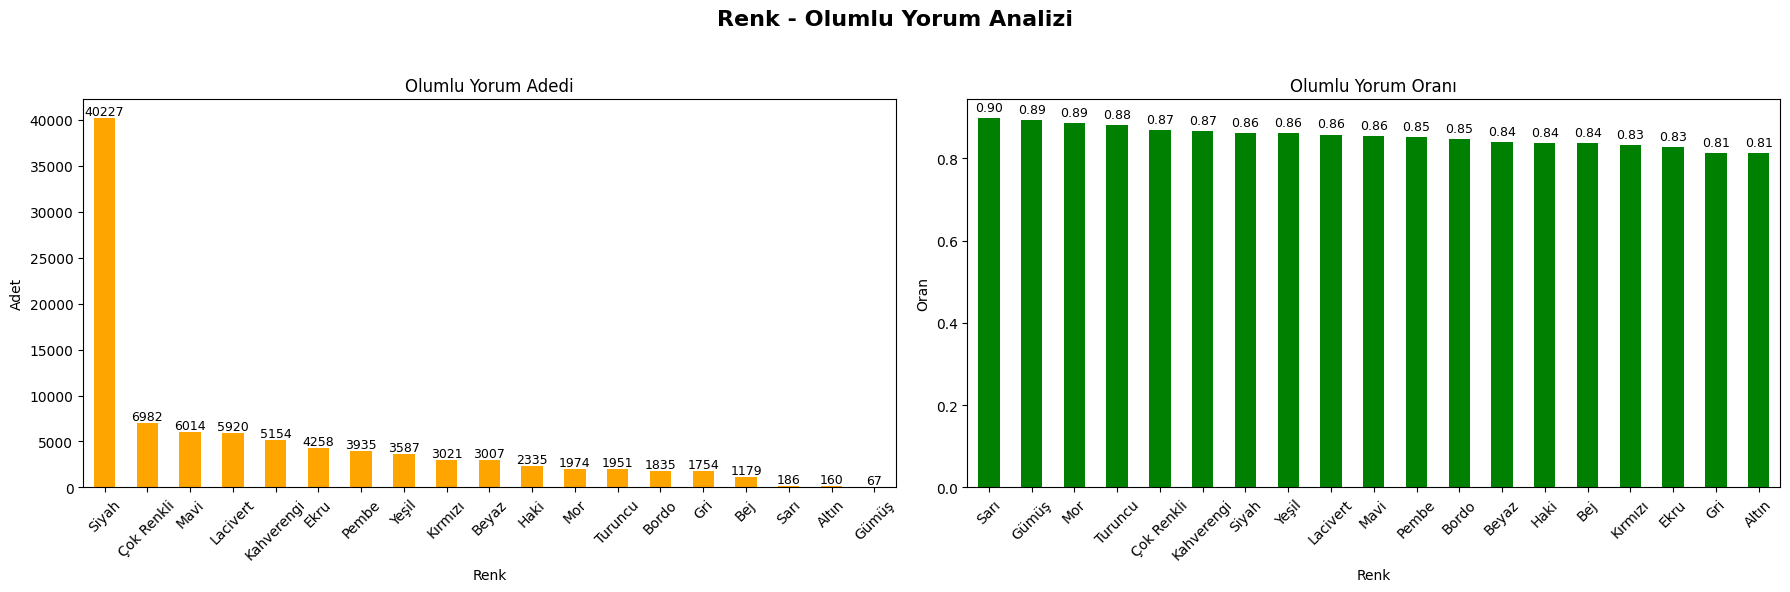


--- ÜRÜN DETAYI ---
Boş (NaN) Ürün Detayı değeri sayısı: 56543

Boş değerlerin final_label dağılımı:
final_label
olumlu     48230
olumsuz     8313
Name: count, dtype: int64


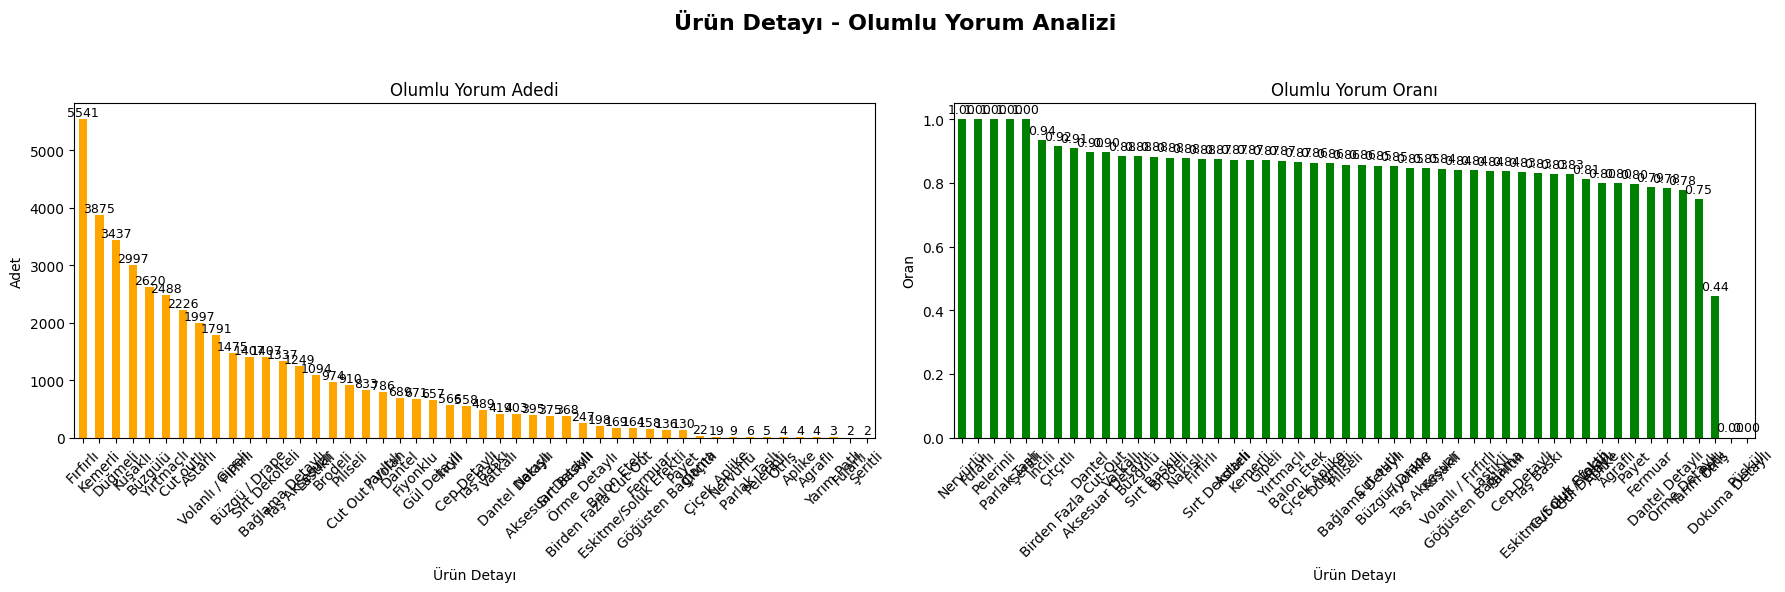


--- CEP ---
Boş (NaN) Cep değeri sayısı: 28937

Boş değerlerin final_label dağılımı:
final_label
olumlu     24738
olumsuz     4199
Name: count, dtype: int64


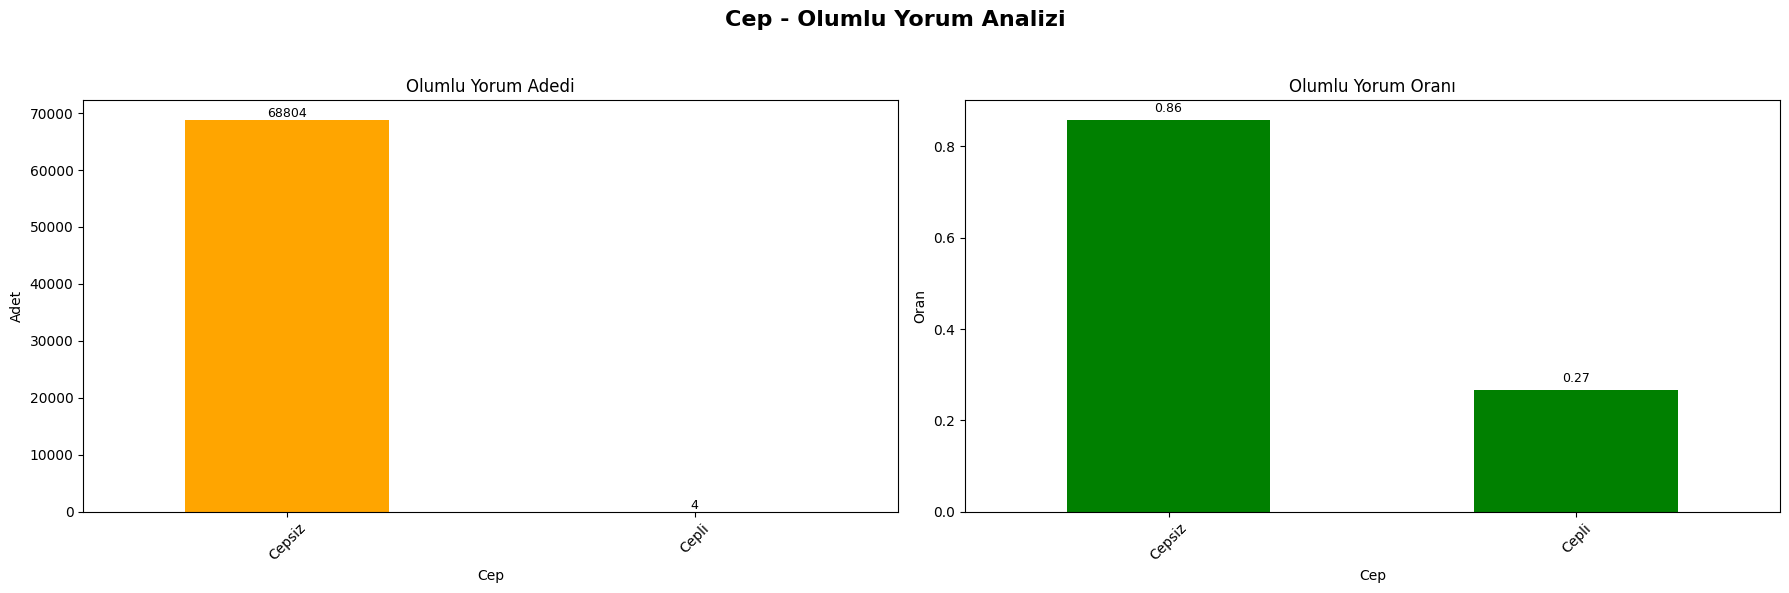


--- KOLEKSIYON ---
Boş (NaN) Koleksiyon değeri sayısı: 66214

Boş değerlerin final_label dağılımı:
final_label
olumlu     55832
olumsuz    10382
Name: count, dtype: int64


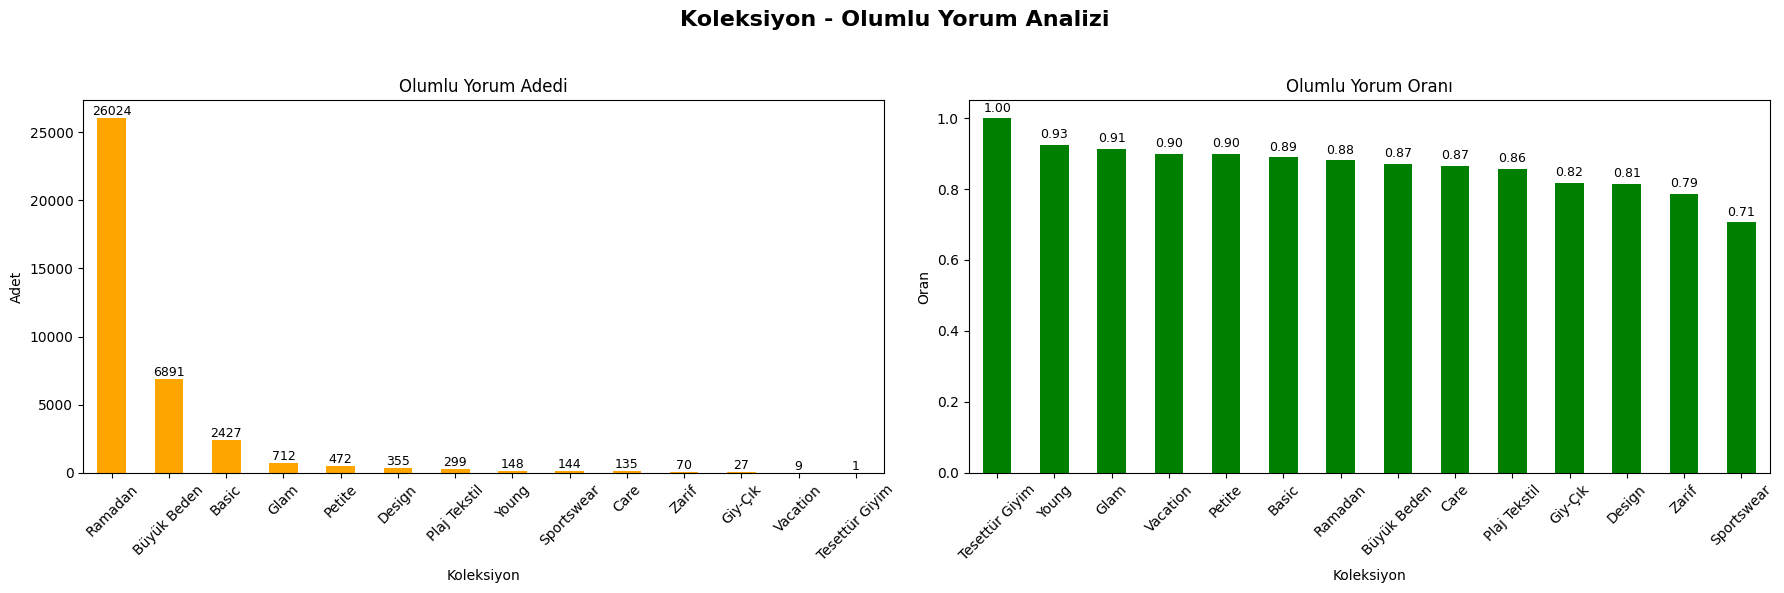


--- ASTAR DURUMU ---
Boş (NaN) Astar Durumu değeri sayısı: 1807

Boş değerlerin final_label dağılımı:
final_label
olumlu     1547
olumsuz     260
Name: count, dtype: int64


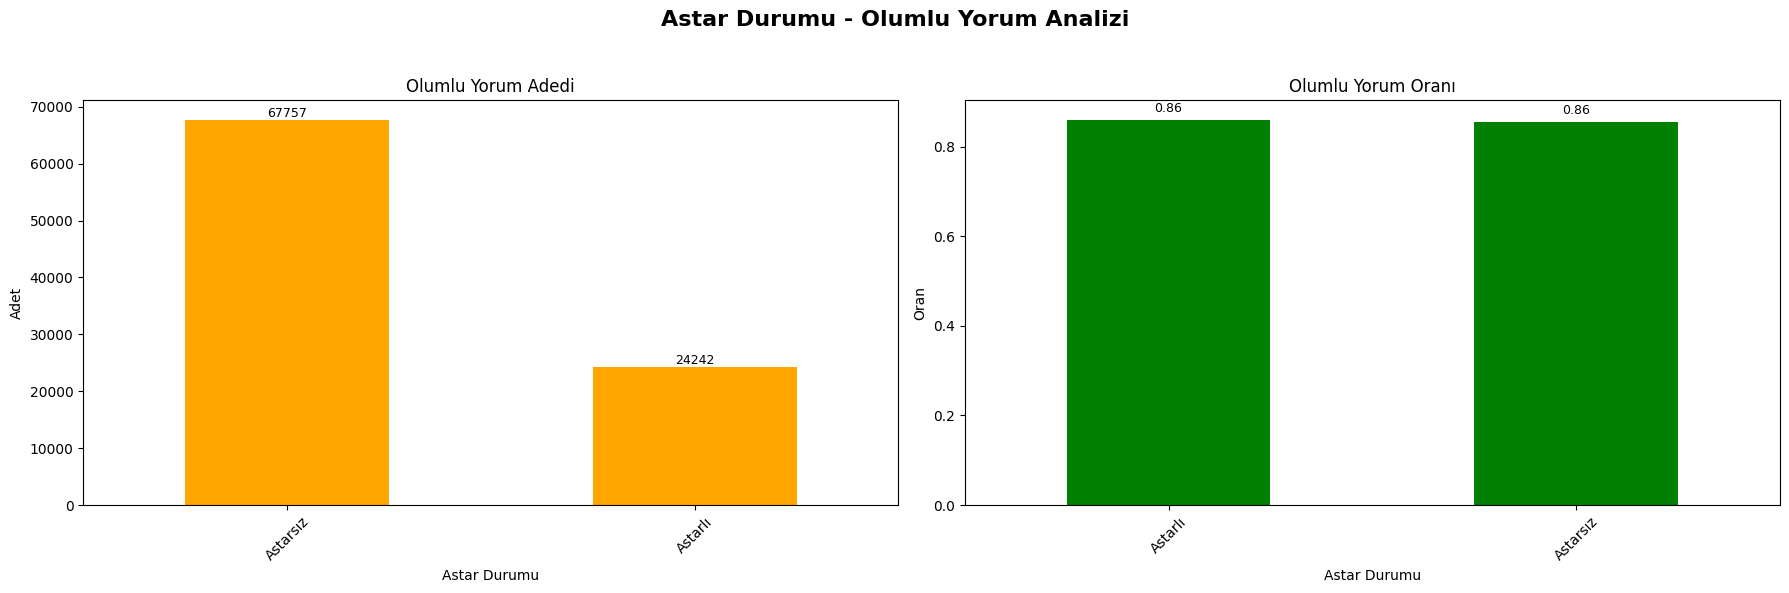


--- BOY_Y ---
Boş (NaN) Boy_y değeri sayısı: 0

Boş değerlerin final_label dağılımı:
Series([], Name: count, dtype: int64)


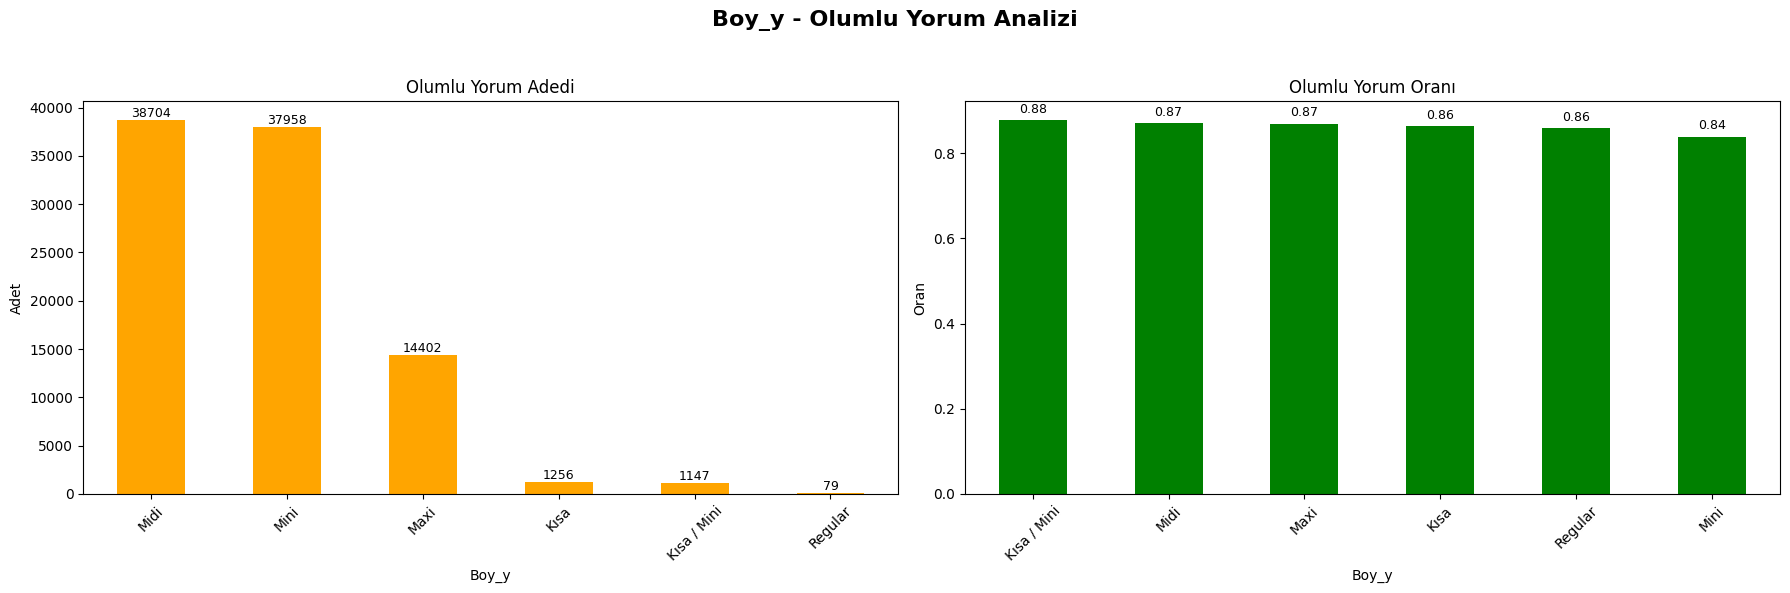


--- SILUET ---
Boş (NaN) Siluet değeri sayısı: 0

Boş değerlerin final_label dağılımı:
Series([], Name: count, dtype: int64)


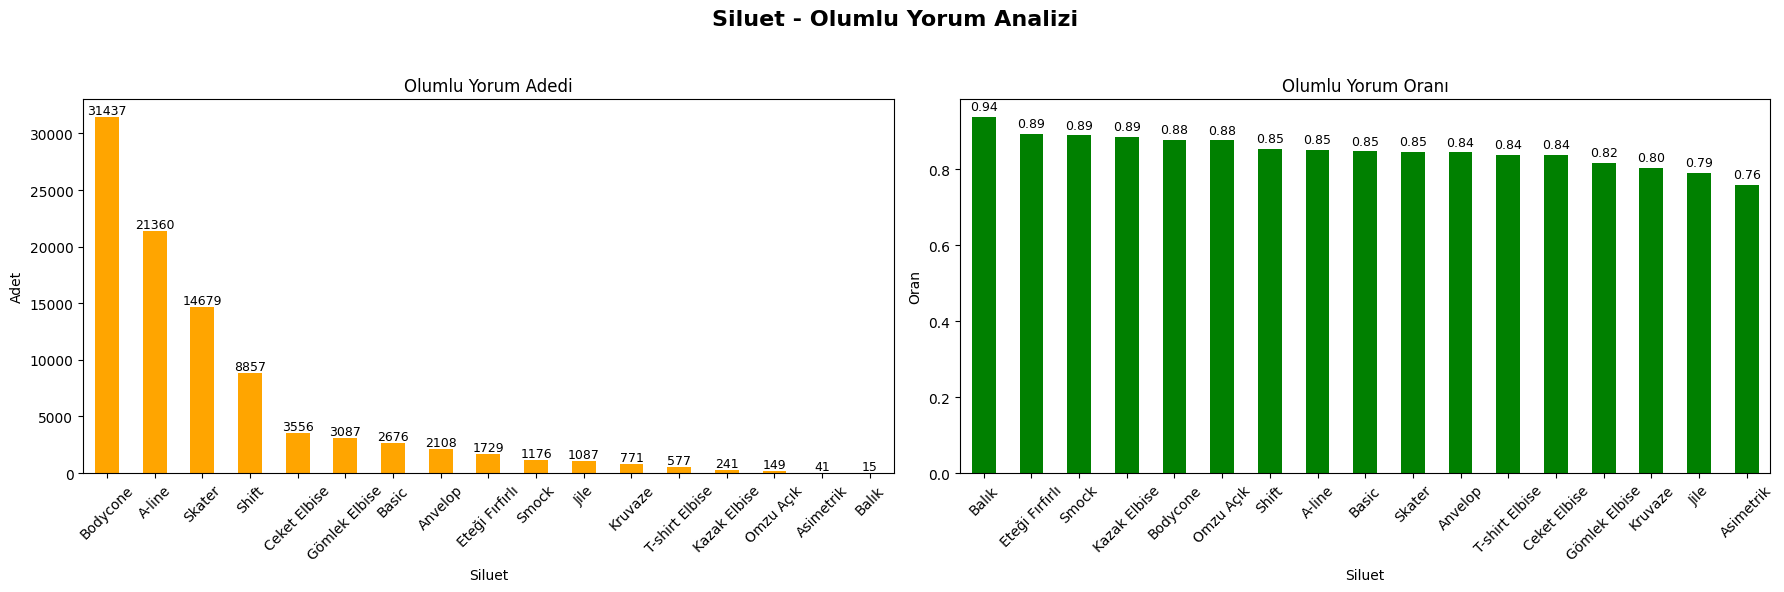


--- ORTAM ---
Boş (NaN) Ortam değeri sayısı: 0

Boş değerlerin final_label dağılımı:
Series([], Name: count, dtype: int64)


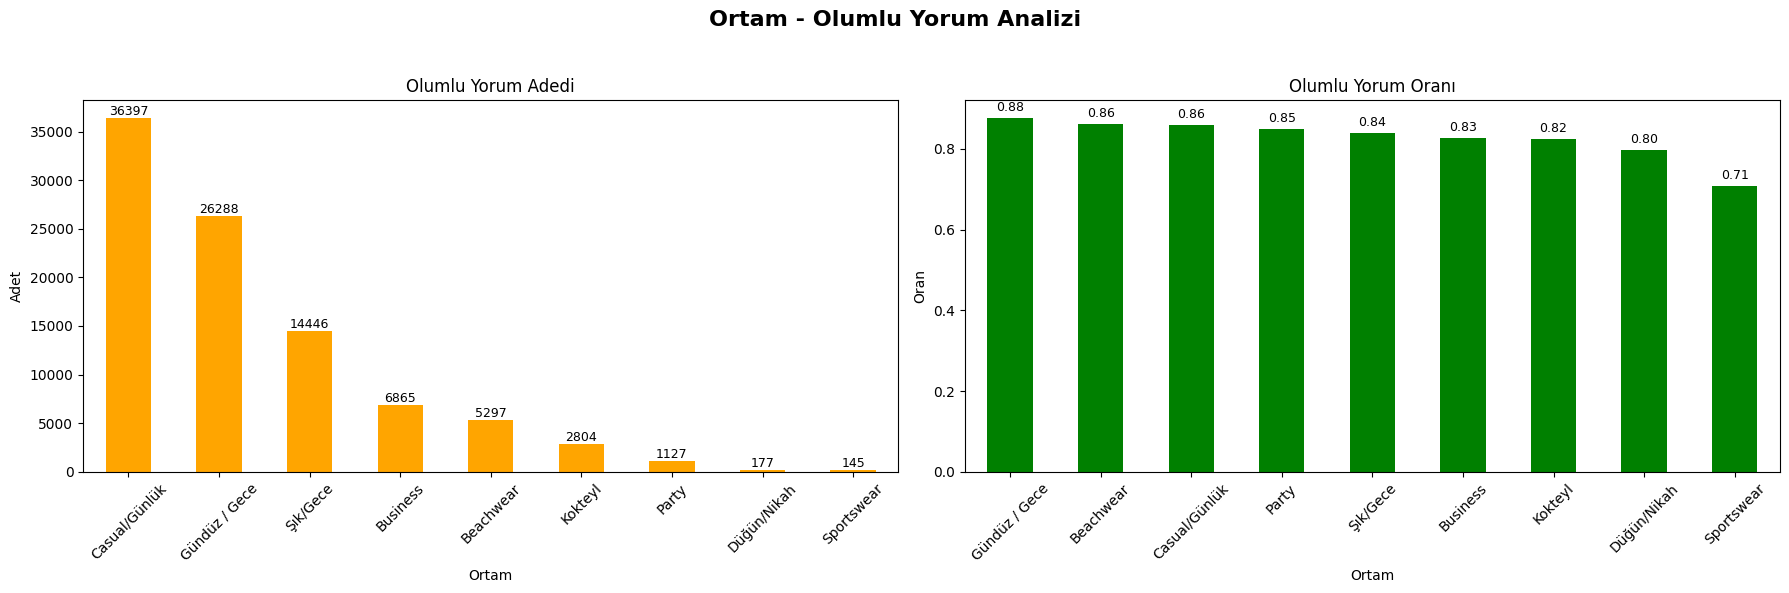


--- DOKUMA TIPI ---
Boş (NaN) Dokuma Tipi değeri sayısı: 0

Boş değerlerin final_label dağılımı:
Series([], Name: count, dtype: int64)


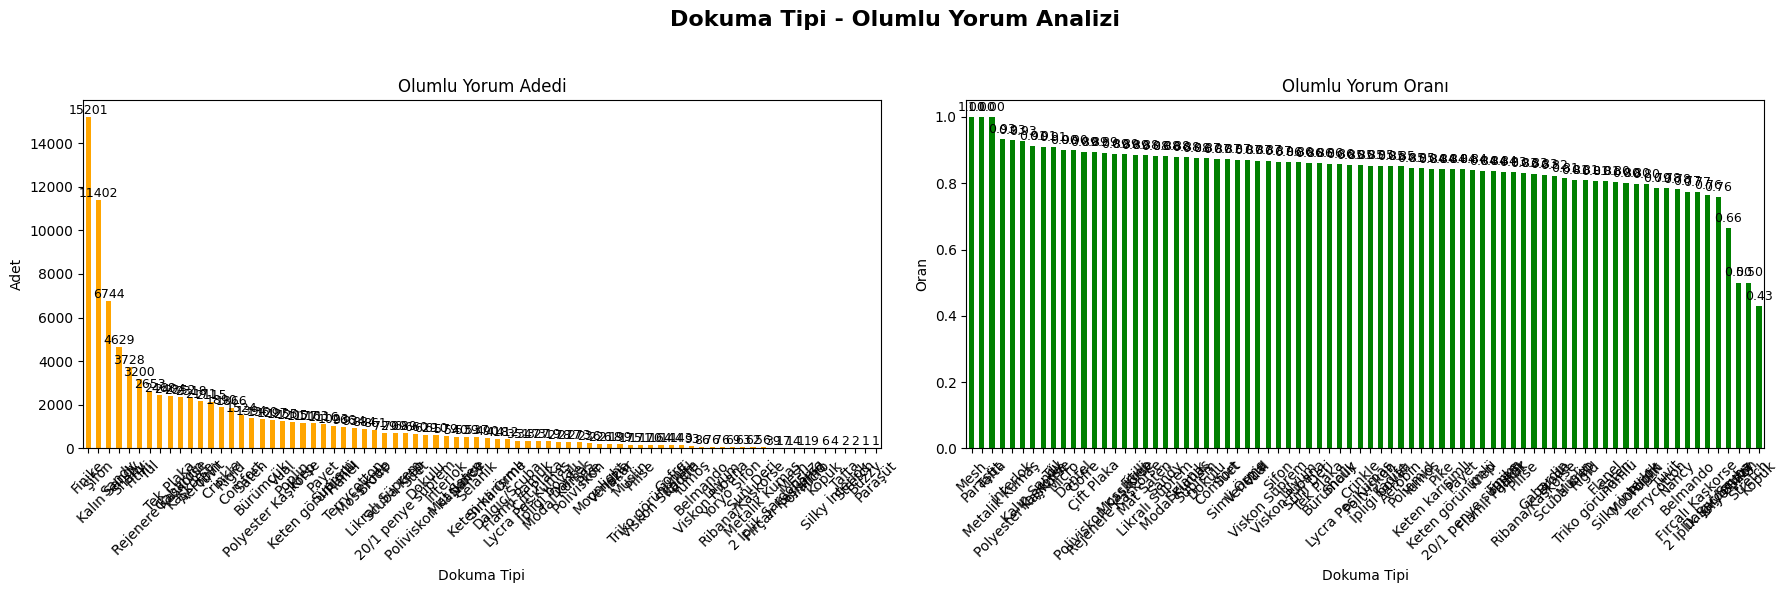


--- BASKI/NAKIŞ TEKNIĞI ---
Boş (NaN) Baskı/Nakış Tekniği değeri sayısı: 76986

Boş değerlerin final_label dağılımı:
final_label
olumlu     65619
olumsuz    11367
Name: count, dtype: int64


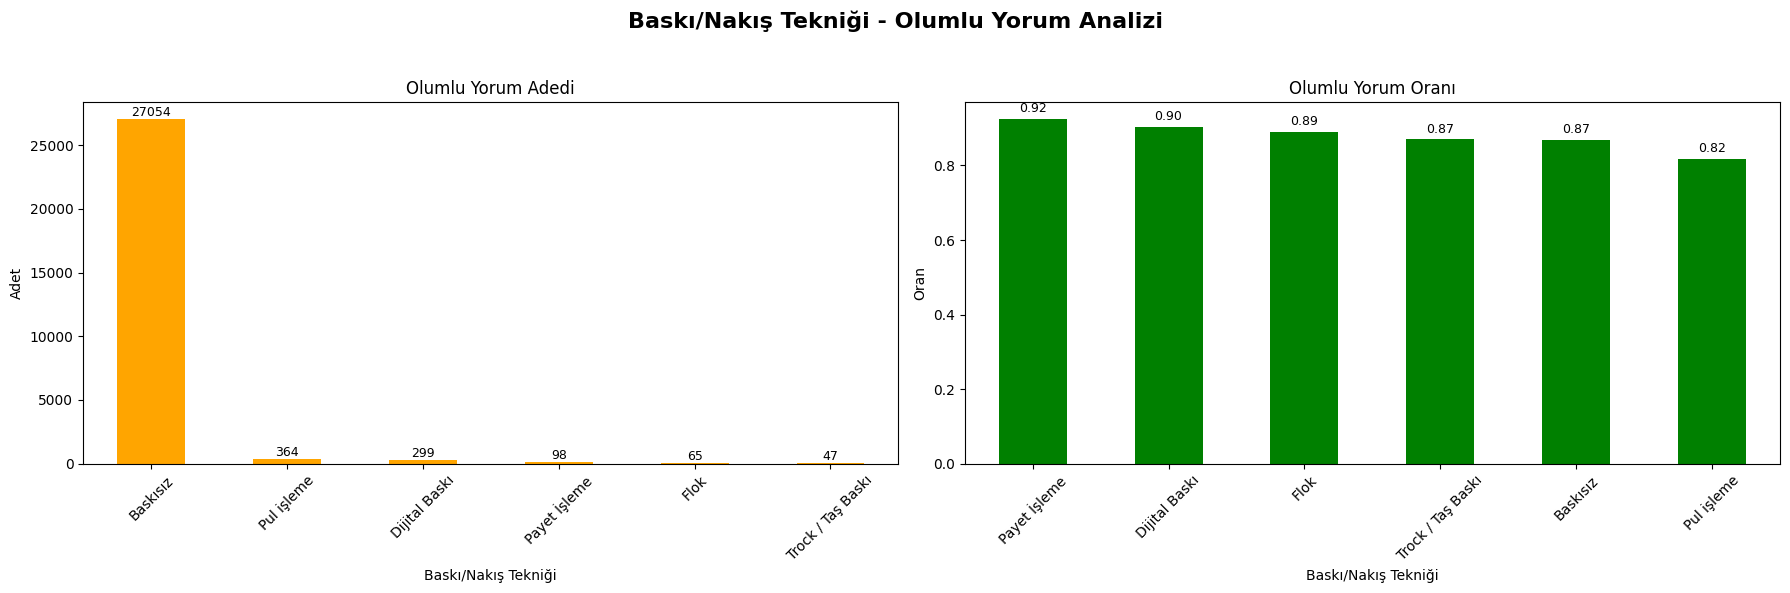


--- KEMER/KUŞAK DURUMU ---
Boş (NaN) Kemer/Kuşak Durumu değeri sayısı: 10948

Boş değerlerin final_label dağılımı:
final_label
olumlu     9307
olumsuz    1641
Name: count, dtype: int64


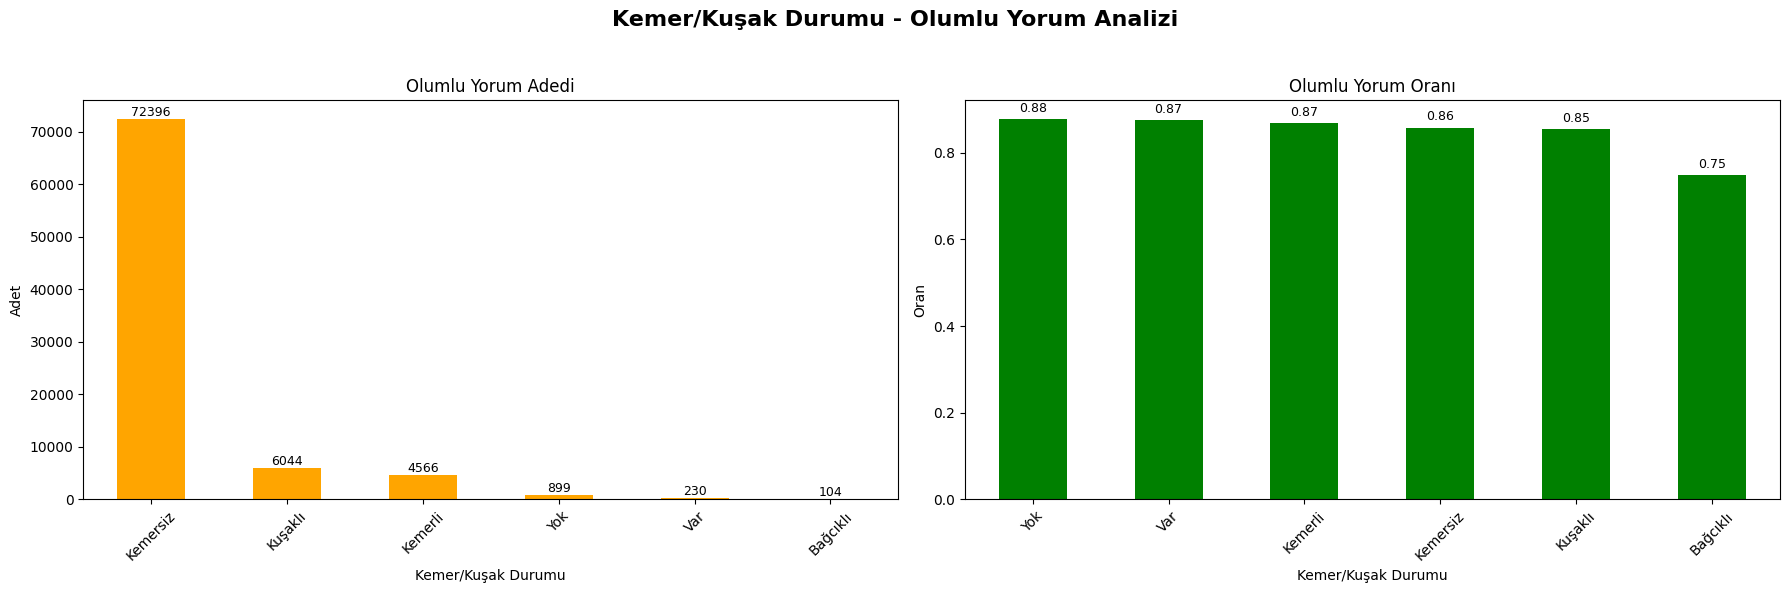


--- SÜRDÜRÜLEBILIRLIK DETAYI ---
Boş (NaN) Sürdürülebilirlik Detayı değeri sayısı: 9910

Boş değerlerin final_label dağılımı:
final_label
olumlu     8496
olumsuz    1414
Name: count, dtype: int64


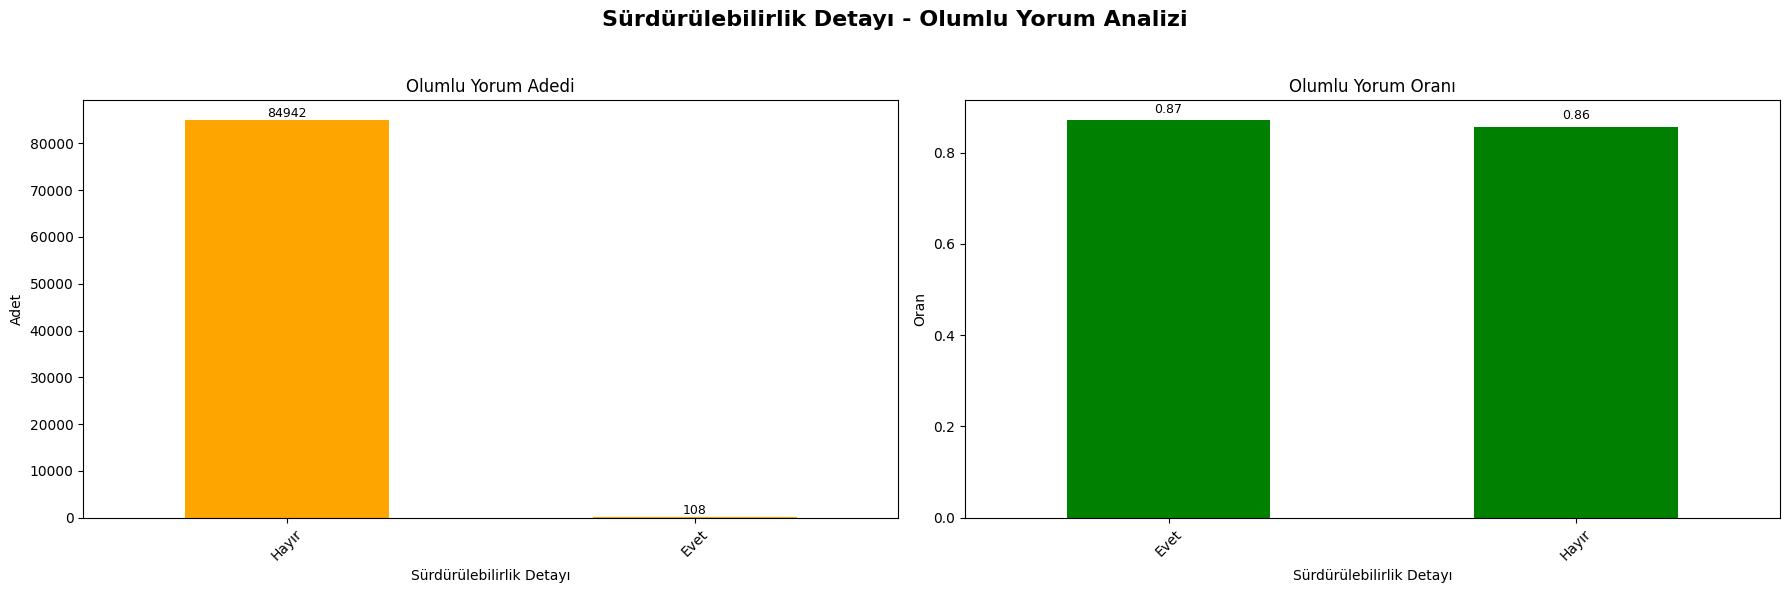


--- PAKET İÇERIĞI ---
Boş (NaN) Paket İçeriği değeri sayısı: 59203

Boş değerlerin final_label dağılımı:
final_label
olumlu     50333
olumsuz     8870
Name: count, dtype: int64


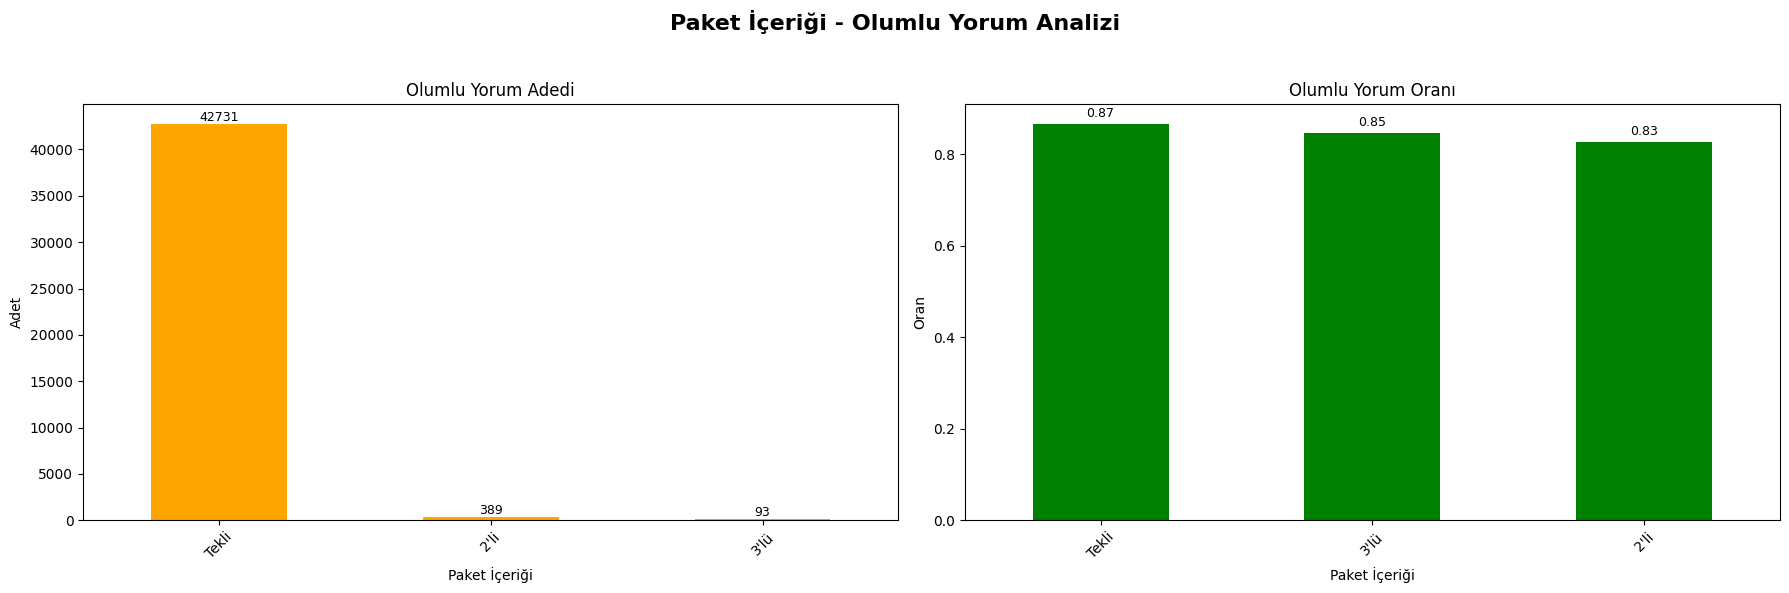


--- YAŞ ---
Boş (NaN) Yaş değeri sayısı: 10214

Boş değerlerin final_label dağılımı:
final_label
olumlu     8750
olumsuz    1464
Name: count, dtype: int64


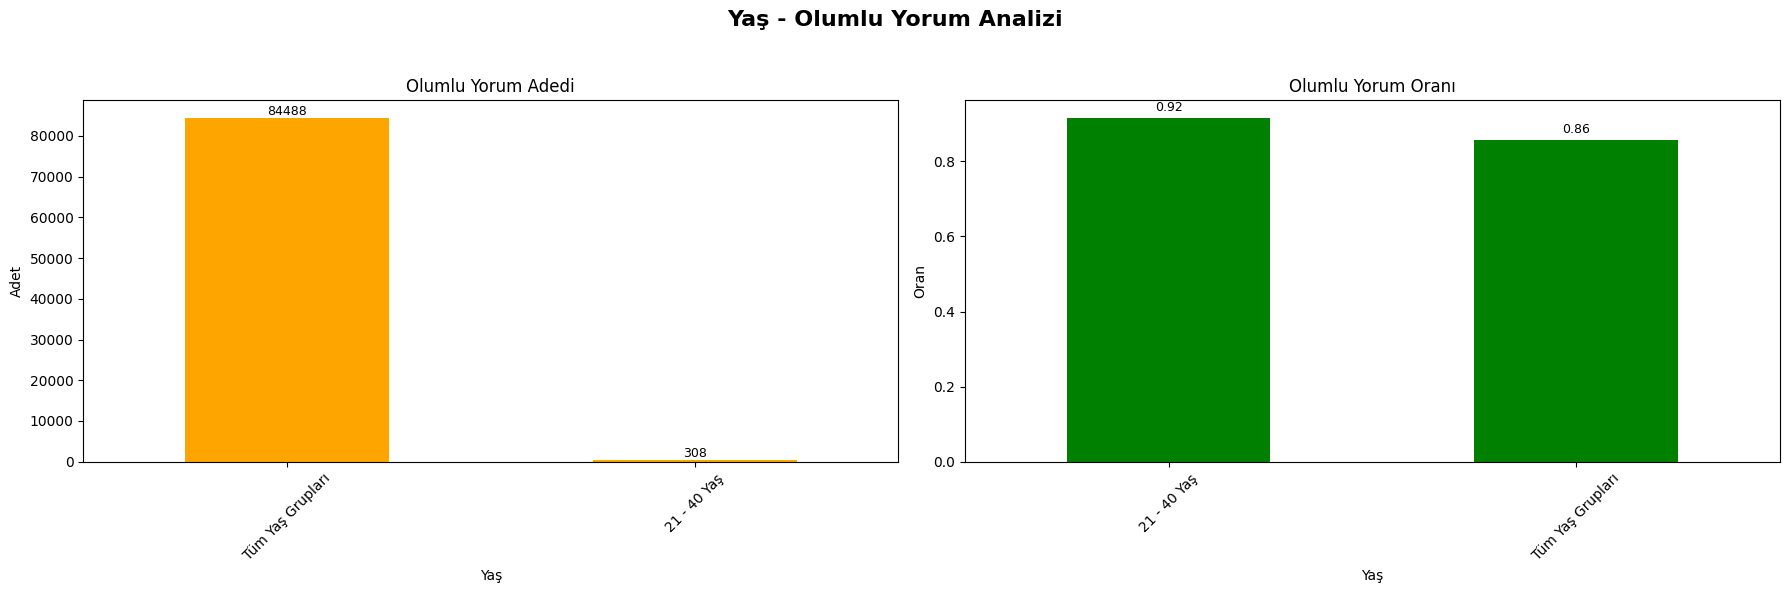


--- SEZON ---
Boş (NaN) Sezon değeri sayısı: 20266

Boş değerlerin final_label dağılımı:
final_label
olumlu     17518
olumsuz     2748
Name: count, dtype: int64


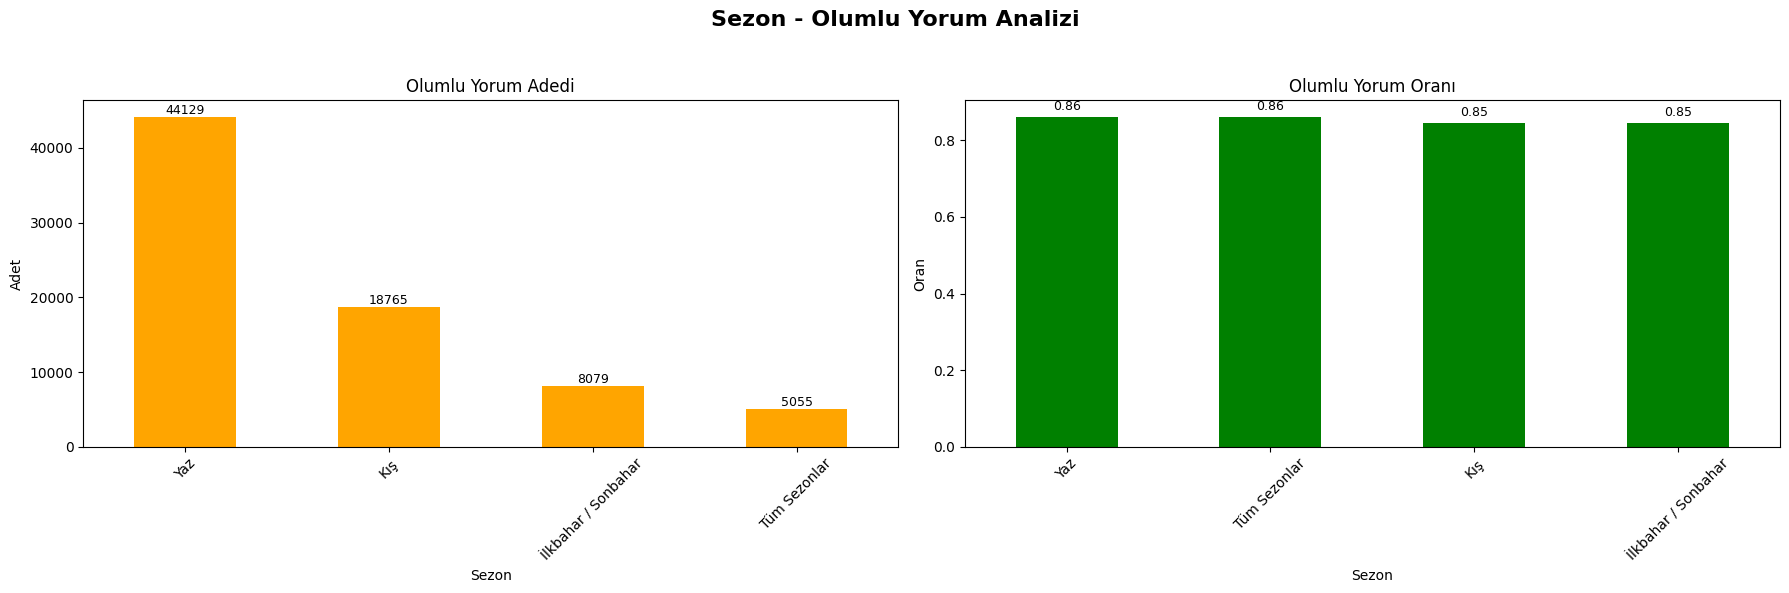


--- EK ÖZELLIK ---
Boş (NaN) Ek Özellik değeri sayısı: 66213

Boş değerlerin final_label dağılımı:
final_label
olumlu     56861
olumsuz     9352
Name: count, dtype: int64


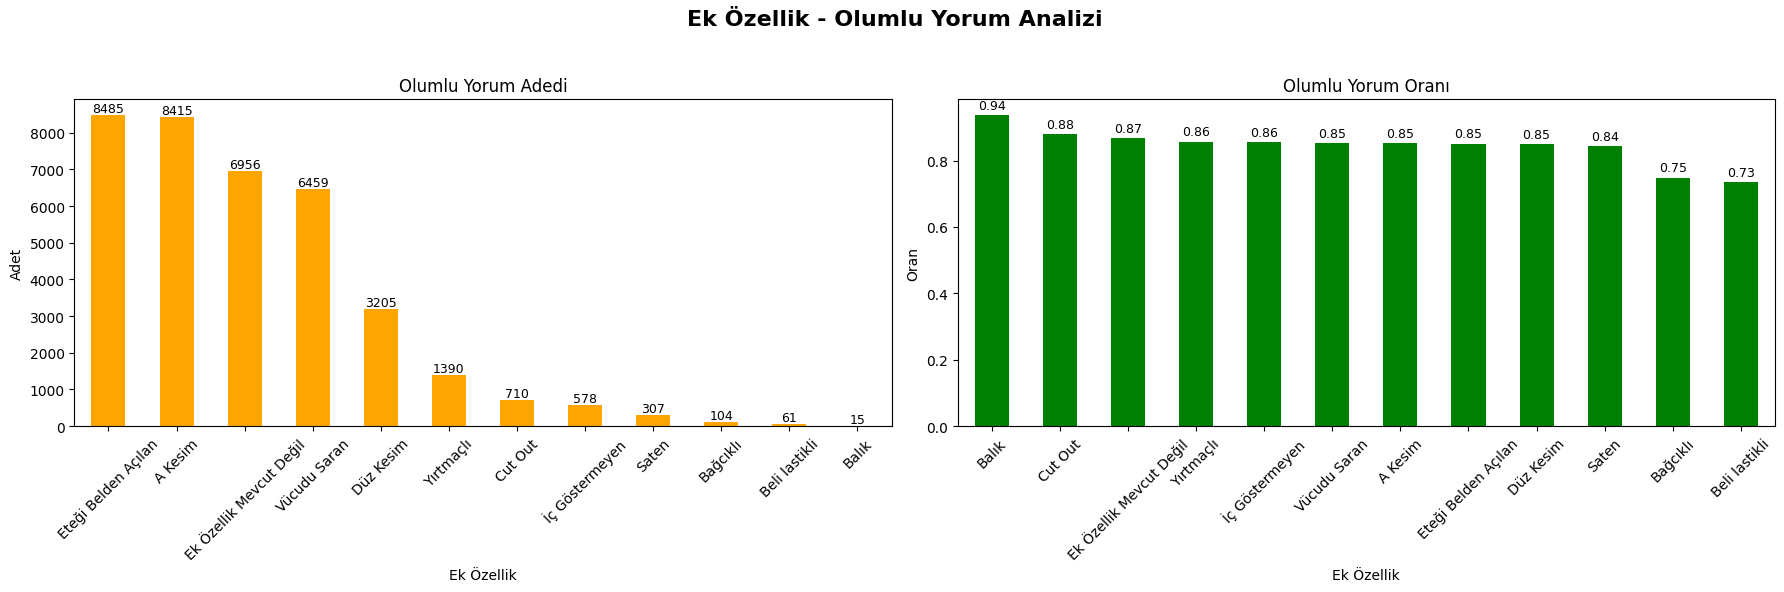


--- KAPAMA ŞEKLI ---
Boş (NaN) Kapama Şekli değeri sayısı: 94655

Boş değerlerin final_label dağılımı:
final_label
olumlu     81002
olumsuz    13653
Name: count, dtype: int64


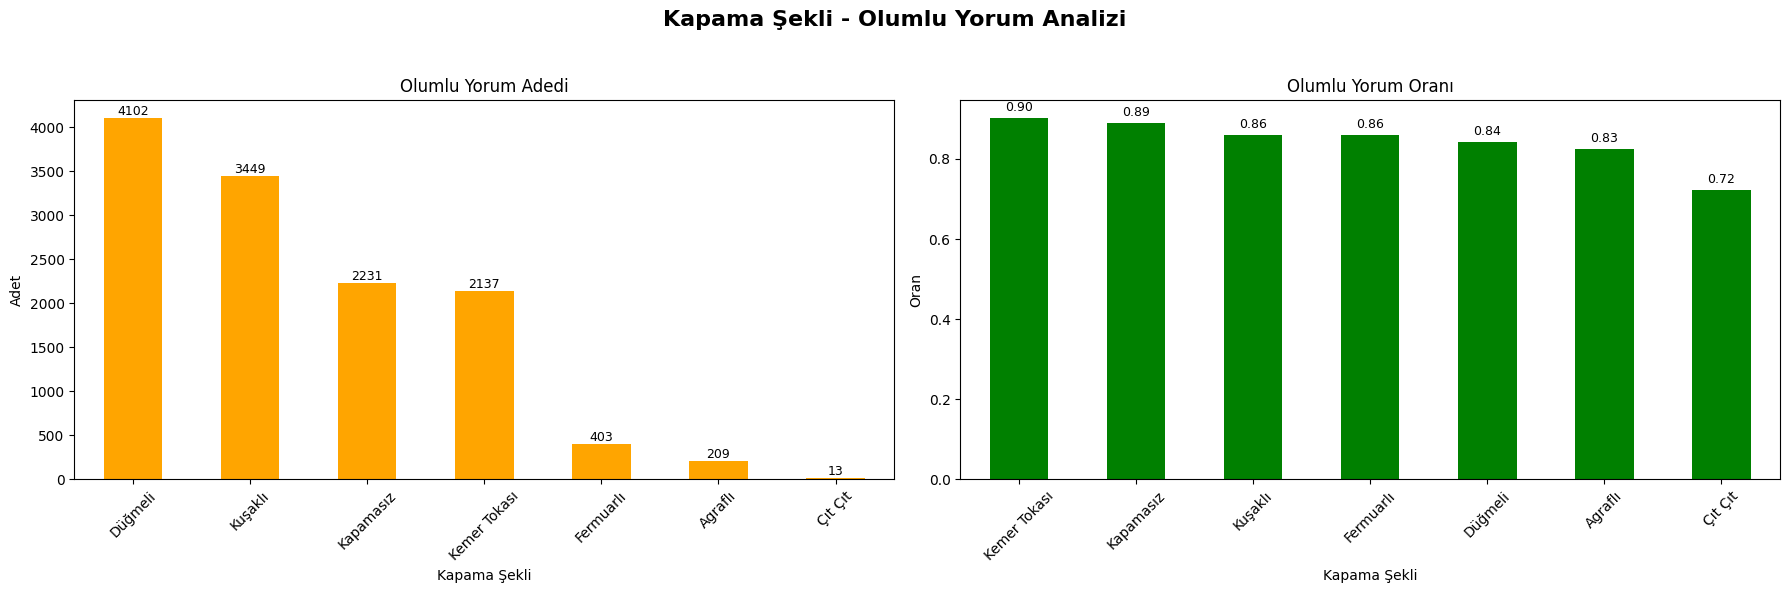


--- KALINLIK ---
Boş (NaN) Kalınlık değeri sayısı: 100403

Boş değerlerin final_label dağılımı:
final_label
olumlu     85900
olumsuz    14503
Name: count, dtype: int64


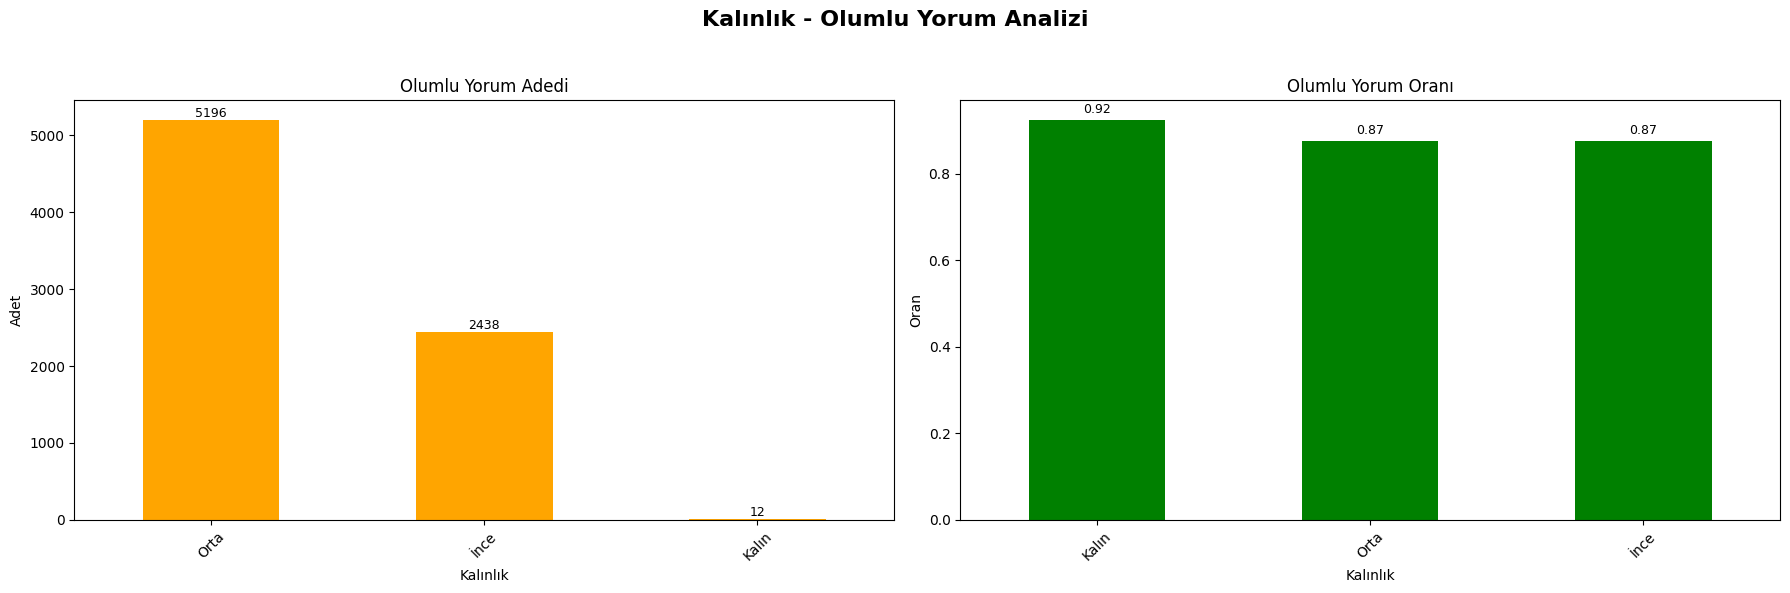

In [11]:
kolonlar = ['Kumaş Tipi', 'Materyal', 'Kalıp', 'Kol Boyu', 'Persona', 'Kol Tipi', 'Desen',
            'Yaka Tipi', 'Renk', 'Ürün Detayı', 'Cep', 'Koleksiyon', 'Astar Durumu', 'Boy_y',
            'Siluet', 'Ortam', 'Dokuma Tipi', 'Baskı/Nakış Tekniği', 'Kemer/Kuşak Durumu',
            'Sürdürülebilirlik Detayı', 'Paket İçeriği', 'Yaş', 'Sezon',
            'Ek Özellik', 'Kapama Şekli', 'Kalınlık']

grafik_olumlu_analiz(df_merged, kolonlar)